In [15]:
import torch
import mlflow

In [16]:
cls_name = ['bad', 'good']

In [17]:
device = torch.device('cpu')

In [18]:
net = torch.load('model_211206.pt', map_location=device)

In [25]:
import image_pyfunc

from importlib import reload
image_pyfunc = reload(image_pyfunc)

In [26]:
image_pyfunc.save_pytorch_model(net, 'model', (1, 3, 540, 540), cls_name)

2021/12/06 21:55:32 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.11.0a0+d3722d3) contains a local version label (+d3722d3). MLflow logged a pip requirement for this package as 'torchvision==0.11.0a0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2021/12/06 21:55:32 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.11.0a0+d3722d3) contains a local version label (+d3722d3). MLflow logged a pip requirement for this package as 'torchvision==0.11.0a0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


In [7]:
import pandas as pd
import base64
from io import BytesIO
from PIL import Image

In [8]:
path = r'/home/jeff/Downloads/拍照簽收圖檔-20211027T020311Z-001/拍照簽收圖檔/正確/111247_74164057328_S.JPG'

In [9]:
def read_image(x):
    with open(x, 'rb') as f:
        return f.read()

data = pd.DataFrame(
    data=[base64.encodebytes(read_image(path))],
    columns=['image']
)

In [10]:
data

,image
0,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDABALDA4MChAO...


In [44]:
d = data.values.reshape(-1)

In [45]:
img_data = base64.decodebytes(d[0])

In [48]:
with BytesIO(img_data) as fd:
    img = Image.open(fd)
    img.load()


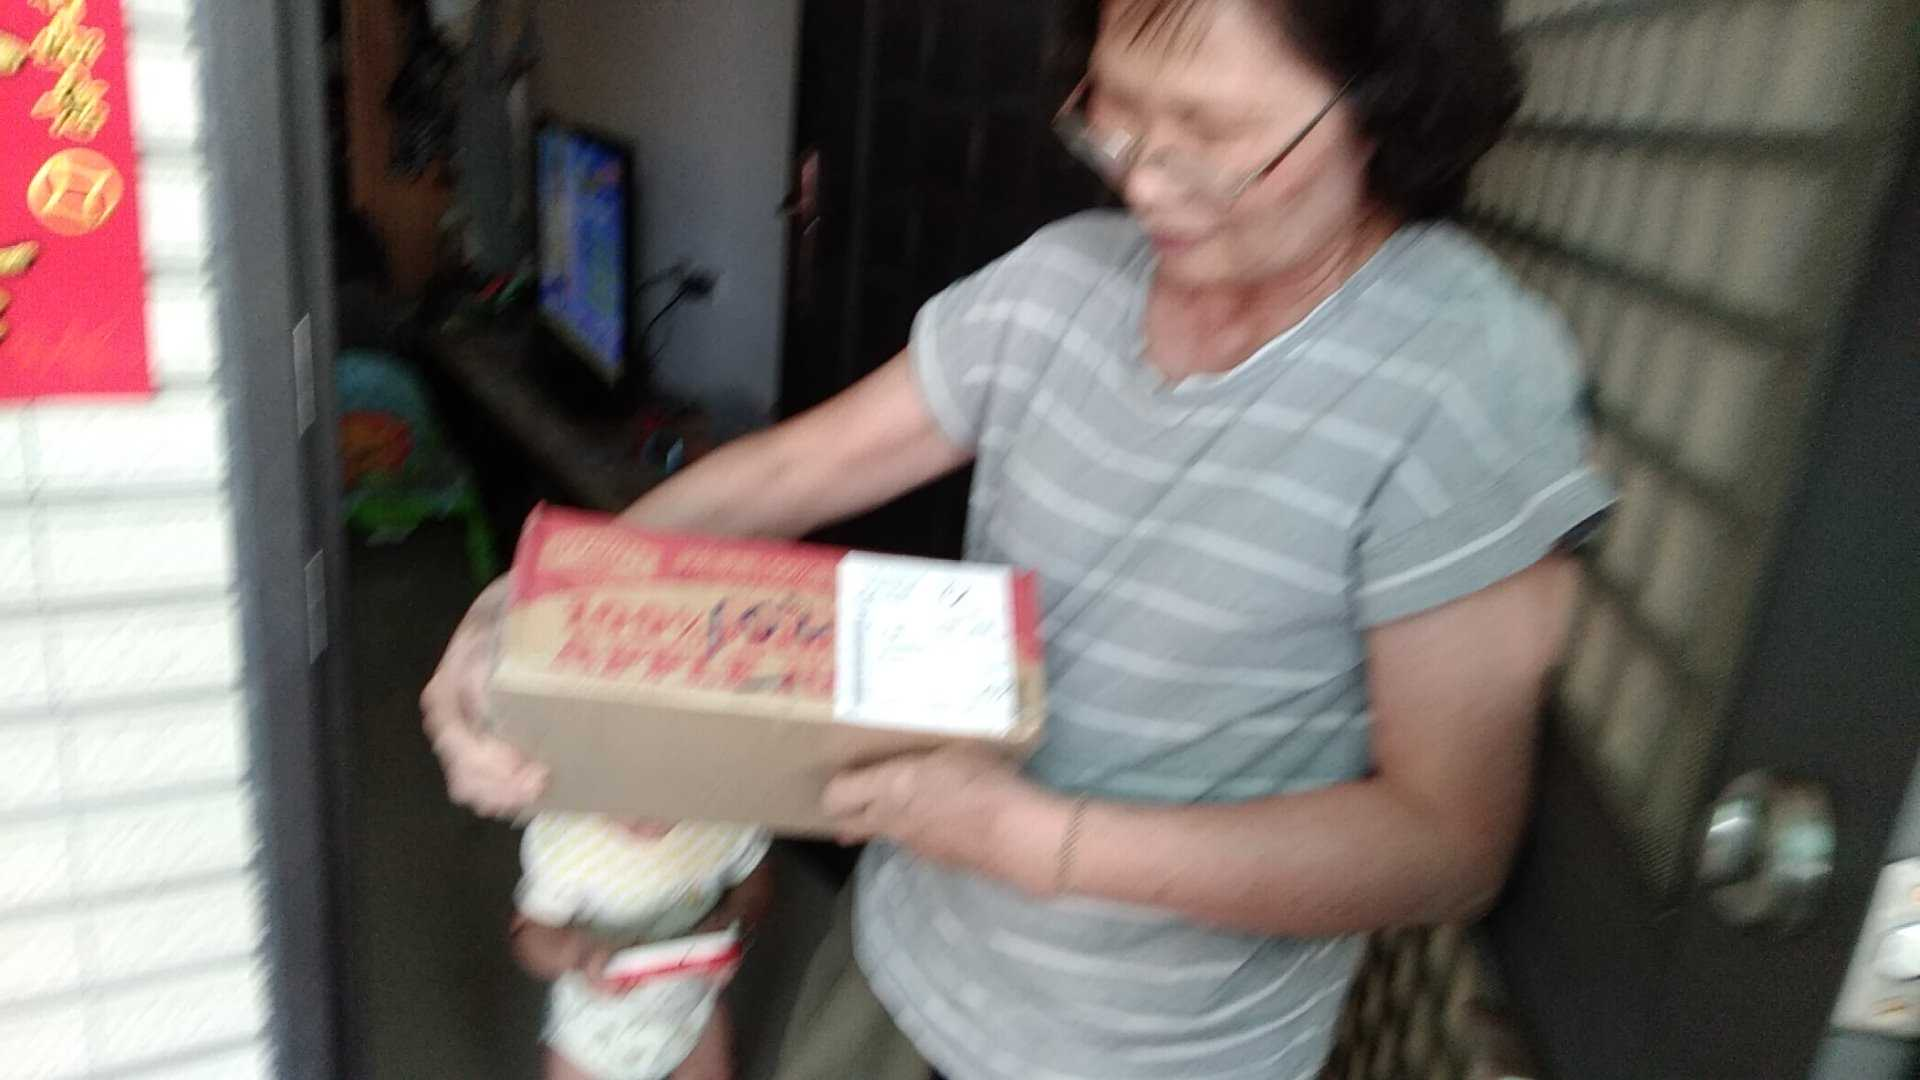

In [49]:
img

(1920, 1080)

In [7]:
s = 'bad/good'

In [9]:
s = s.split('/')

In [10]:
print(s)

['bad', 'good']


In [11]:
dims_str = '1/3/540/540'

In [12]:
dims = [int(i) for i in dims_str.split('/')]

In [13]:
dims

[1, 3, 540, 540]

In [14]:
dims[2:]

[540, 540]